In [26]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import textblob

import data

# Data Cleaning

In [2]:
train = data.train()
validation = data.validation()
test = data.test()

Just taking a brief look at the topic distribution. It appears that it's not even for each test set. 

In [3]:
train['topic'].unique(), validation['topic'].unique(), test['topic'].unique()

(array(['ordinary_life', 'school_life', 'culture_education',
        'attitude_emotion', 'relationship', 'tourism', 'health', 'work'],
       dtype=object),
 array(['work'], dtype=object),
 array(['work', 'politics', 'finance'], dtype=object))

Yeah the original dataset is simply sorted topics. I can't trust the topics. Not only that, they aren't really meaningful from one dataset to the next.

In [4]:
topics = pd.read_csv('data/ijcnlp_dailydialog/dialogues_topic.txt') # original unparsed
topics = topics['1']

print('Train dataset unique: {}\n'.format(topics[0:11118].unique()))
print('Validation dataset unique: {}\n'.format(topics[11118:12118].unique()))
print('Test dataset unique: {}\n'.format(topics[12118: 13118].unique()))

Train dataset unique: [1 2 3 4 5 6 7 8]

Validation dataset unique: [8]

Test dataset unique: [ 8  9 10]



##### Not going to use Topics for now. 

# Goals of Exploration
- Plot some conversation samples
- Observe and explore why 3 of the major changes in conversations happened?
    - Topics
    - Replies

In [140]:
def _clean(string):
    string = string.lower()
    return string

def word_tokenize(string):
    return string.split(' ')

## Let's look at ten random conversations

In [177]:
from matplotlib.gridspec import GridSpec

''

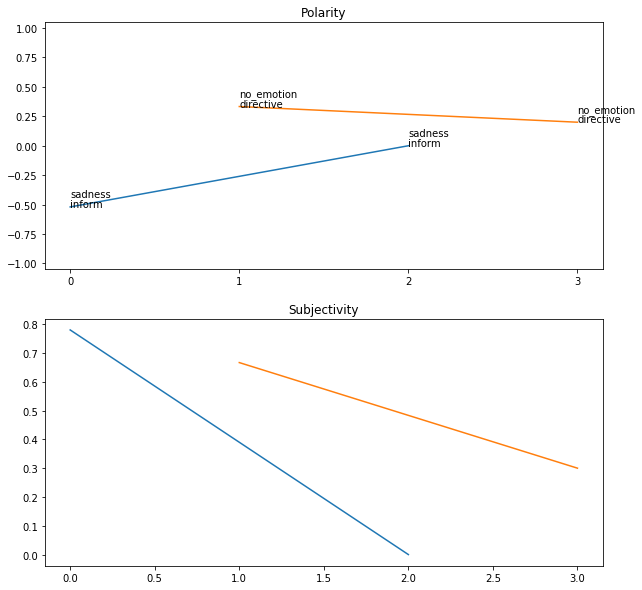

In [189]:
values = set(train.index.get_level_values(0))
num_convs = len(values)
conv_ids = np.random.randint(0, num_convs, 10)

conv_id = conv_ids[9]

one = train.loc[conv_id]

person_a = one[one['person'] == 'person_a']
person_b = one[one['person'] == 'person_b']

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_ylim(-1.05, 1.05)
ax1.set_xticks(range(one.shape[0]))
ax1.set_title('Polarity')

ax1.plot(person_a.index, person_a['polarity'])
ax1.plot(person_b.index, person_b['polarity'])

for i, act, emo in zip(person_a.index, person_a['act'], person_a['emo']):
    ax1.annotate(act, (i, person_a.loc[i]['polarity']))
    ax1.annotate(emo, (i, person_a.loc[i]['polarity'] + .085))

for i, act, emo in zip(person_b.index, person_b['act'], person_b['emo']):
    ax1.annotate(act, (i, person_b.loc[i]['polarity']))
    ax1.annotate(emo, (i, person_b.loc[i]['polarity'] + .085))

ax2.set_title('Subjectivity')
ax2.plot(person_a.index, person_a['subjectivity'])
ax2.plot(person_b.index, person_b['subjectivity'])
;

In [111]:
person_b.loc[1]['act']

'directive'

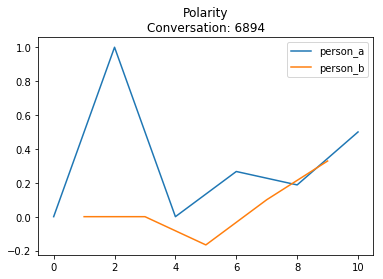

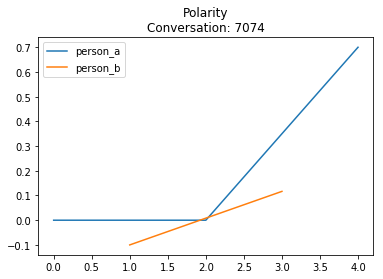

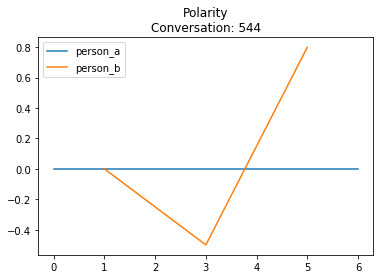

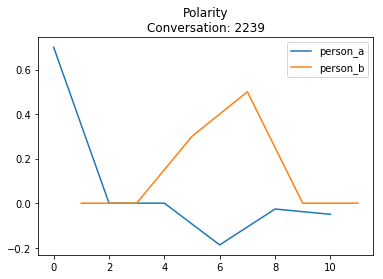

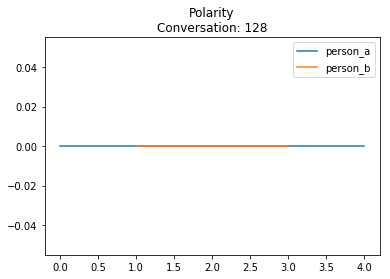

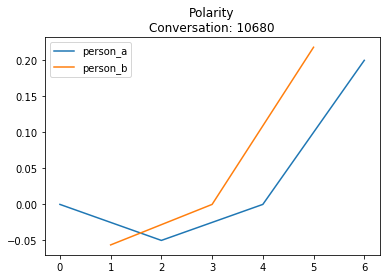

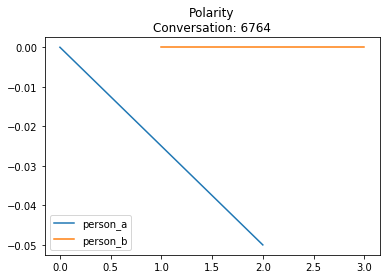

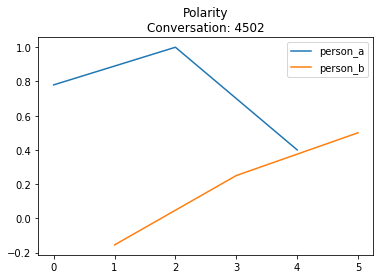

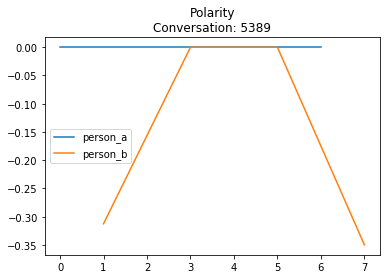

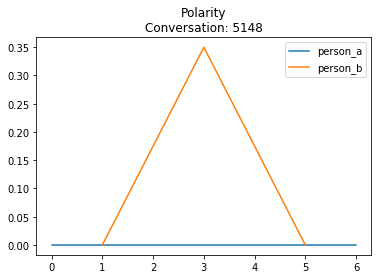

In [72]:
for conv_id in conv_ids:
    plt.figure()
    one = train.loc[conv_id]
    title='Polarity\nConversation: {}'.format(conv_id)
#     for idx, group in one.groupby('person')['polarity']:
#         group.plot(title=title, legend=True)
    one.groupby('person')['polarity'].plot(title=title, legend=True)

person
person_a    AxesSubplot(0.125,0.125;0.775x0.755)
person_b    AxesSubplot(0.125,0.125;0.775x0.755)
Name: polarity, dtype: object

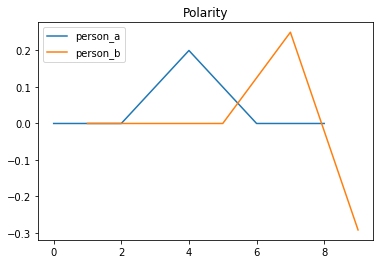

In [8]:
one

,person,utter,act,emo,polarity,subjectivity,topic
0,person_a,"Say , Jim , how about going for a few beers af...",directive,no_emotion,-0.200000,0.100000,ordinary_life
1,person_b,You know that is tempting but is really not g...,commissive,no_emotion,-0.350000,0.600000,ordinary_life
2,person_a,What do you mean ? It will help us to relax .,question,no_emotion,-0.312500,0.687500,ordinary_life
3,person_b,Do you really think so ? I don't . It will ju...,question,no_emotion,-0.100000,0.380556,ordinary_life
4,person_a,I guess you are right.But what shall we do ? ...,question,no_emotion,0.000000,0.000000,ordinary_life
5,person_b,I suggest a walk over to the gym where we can...,directive,no_emotion,0.000000,0.000000,ordinary_life
6,person_a,That's a good idea . I hear Mary and Sally of...,commissive,happiness,0.700000,0.600000,ordinary_life
7,person_b,"Sounds great to me ! If they are willing , we...",inform,happiness,0.637500,0.675000,ordinary_life
8,person_a,Good.Let ' s go now .,directive,happiness,0.000000,0.000000,ordinary_life
9,person_b,All right .,commissive,happiness,0.285714,0.535714,ordinary_life
